No Place for Hate

We seek to find the correlation of the occurrence of Hate Crimes and:
* Education
* Poverty
* Unemployment Rates




In [1]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import linregress
import plotly.express as px


In [2]:
#read all csv file and review the sample rows
edu_data = pd.read_csv("Resources/EducationReport.csv")
unempl_data = pd.read_csv("Resources/Unemployment.csv", encoding="ISO-8859-1")
crime_data_df = pd.read_csv("Resources/estimated_crimes_1979_2018_rev1.csv")
poverty_df = pd.read_csv("Resources/PovertyReport.csv")
hate_crime_df = pd.read_csv("Resources/hate_crimes538.csv")
regions_df = pd.read_csv("Resources/Regions.csv")

In [3]:
#create a new dataframe with education data, only needed columns for years 2014-2018
edu_data_df = pd.DataFrame(edu_data)
edu_data_mycolm = edu_data_df[["Unnamed: 0", "Total.4", "Urban.4", "Rural.4"]]
#renamed the columns to have more meaningful names
edu_data_upd = edu_data_mycolm.rename(columns={"Unnamed: 0" : "area_name", "Total.4" : "Total Edu 2014-18", "Urban.4" : "Total Edu Urban 2024-18", "Rural.4" : "Total Edu Rural 2014-18"})
#dropped the first row of the data set with column titles for consistency
edu_data_final = edu_data_upd.drop([0,1], axis=0)
edu_data_final.head(3)

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18
2,Alabama,24.90%,28.00%,15.20%
3,Alaska,29.20%,31.80%,23.90%
4,Arizona,28.90%,29.60%,15.80%


In [4]:
#create the column with average data for years 2014-18 and add it to the dataset
unempl_data["Average Unempl 2014-18"] =(unempl_data["Unemployment_rate_2018"] + unempl_data["Unemployment_rate_2017"]
+ unempl_data["Unemployment_rate_2016"] + unempl_data["Unemployment_rate_2015"] + 
unempl_data["Unemployment_rate_2014"])/4
unempl_data["Average Unempl 2014-18"] = unempl_data["Average Unempl 2014-18"].map("{:.2f}%".format)
unempl_data.head(3)

,FIPStxt,Stabr,area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Average Unempl 2014-18
0,0,US,United States,NaN,NaN,NaN,"142,601,667","136,904,680","5,696,987",4.0,...,"155,102,319","6,286,707",3.9,"163,100,055","157,115,247","5,984,808",3.7,"61,937",NaN,6.10%
1,1000,AL,Alabama,NaN,NaN,NaN,"2,133,223","2,035,594","97,629",4.6,...,"2,130,845","85,782",3.9,"2,241,747","2,174,483","67,264",3.0,"49,881",100.0,6.73%
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,"21,720","20,846",874,4.0,...,"25,261",935,3.6,"26,172","25,458",714,2.7,"59,338",119.0,5.85%


In [5]:
#filter dataset to the state level - remove counties (the columns "rural urban code" & "metro 2013" are empty for the states)
unempl_data['Rural_urban_continuum_code_2013'].replace('', np.nan, inplace=True)
unempl_state_interim = unempl_data[unempl_data['Rural_urban_continuum_code_2013'].isnull()]
unempl_state_interim
unempl_data_clean = unempl_state_interim[unempl_state_interim['Metro_2013']!=0]
unempl_data_clean.head(10)

,FIPStxt,Stabr,area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Average Unempl 2014-18
0,0,US,United States,NaN,NaN,NaN,"142,601,667","136,904,680","5,696,987",4.0,...,"155,102,319","6,286,707",3.9,"163,100,055","157,115,247","5,984,808",3.7,"61,937",NaN,6.10%
1,1000,AL,Alabama,NaN,NaN,NaN,"2,133,223","2,035,594","97,629",4.6,...,"2,130,845","85,782",3.9,"2,241,747","2,174,483","67,264",3.0,"49,881",100.0,6.73%
69,2000,AK,Alaska,NaN,NaN,NaN,"319,511","299,146","20,365",6.4,...,"329,901","22,761",6.5,"347,779","326,430","21,349",6.1,"74,912",100.0,8.55%
102,4000,AZ,Arizona,NaN,NaN,NaN,"2,509,883","2,410,581","99,302",4.0,...,"3,260,518","162,065",4.7,"3,551,260","3,384,504","166,756",4.7,"59,079",100.0,6.95%
118,5000,AR,Arkansas,NaN,NaN,NaN,"1,258,301","1,204,695","53,606",4.3,...,"1,303,995","49,310",3.6,"1,362,642","1,314,290","48,352",3.5,"47,094",100.0,5.58%
194,6000,CA,California,NaN,NaN,NaN,"16,867,808","16,033,179","834,629",4.9,...,"18,460,725","820,096",4.3,"19,411,572","18,627,378","784,194",4.0,"75,250",100.0,7.03%
253,8000,CO,Colorado,NaN,NaN,NaN,"2,359,515","2,294,408","65,107",2.8,...,"2,983,498","97,163",3.2,"3,148,766","3,062,098","86,668",2.8,"71,949",100.0,4.58%
318,9000,CT,Connecticut,NaN,NaN,NaN,"1,764,126","1,721,913","42,213",2.4,...,"1,821,891","78,773",4.1,"1,913,530","1,842,164","71,366",3.7,"76,366",100.0,6.62%
327,10000,DE,Delaware,NaN,NaN,NaN,"413,500","398,027","15,473",3.7,...,"463,542","18,231",3.8,"487,263","468,844","18,419",3.8,"65,467",100.0,5.88%
331,11000,DC,District of Columbia,NaN,NaN,NaN,"310,469","293,086","17,383",5.6,...,"381,703","23,036",5.7,"409,969","387,482","22,487",5.5,"82,533",100.0,8.17%


In [6]:
year_list = ["2014", "2015", "2016", "2017", "2018"]
crime_data_df = crime_data_df[crime_data_df.year.isin(year_list)]
crime_data_df.head(50)

,year,state_abbr,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
35,2014,NaN,318907401,1153022,14164,84864.0,118027.0,322905,731089,8209010,1713153,5809054,686803,NaN
36,2015,NaN,320896618,1199310,15883,91261.0,126134.0,328109,764057,8024115,1587564,5723488,713063,NaN
37,2016,NaN,323405935,1285606,17413,96970.0,132414.0,332797,802982,7928530,1516405,5644835,767290,NaN
73,2014,AK,737046,4684,41,553.0,771.0,629,3243,20334,3150,15445,1739,NaN
74,2015,AK,737709,5391,59,648.0,900.0,761,3671,20806,3511,15249,2046,NaN
75,2016,AK,741522,5966,52,754.0,1053.0,850,4011,24876,4053,17766,3057,NaN
76,2017,AK,739786,6338,62,NaN,1074.0,952,4250,26203,4167,17782,4254,NaN
77,2018,AK,737438,6526,47,NaN,1192.0,896,4391,24339,3979,16364,3996,NaN
113,2014,AL,4846411,20727,276,1425.0,2005.0,4702,13744,154087,39723,104223,10141,NaN
114,2015,AL,4853875,22957,348,1449.0,2037.0,4612,15960,144785,35265,99182,10338,NaN


In [7]:
crime_data_df.dropna(subset=['state_abbr'], how='any')
crime_data_df.head(10)

,year,state_abbr,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
35,2014,NaN,318907401,1153022,14164,84864.0,118027.0,322905,731089,8209010,1713153,5809054,686803,NaN
36,2015,NaN,320896618,1199310,15883,91261.0,126134.0,328109,764057,8024115,1587564,5723488,713063,NaN
37,2016,NaN,323405935,1285606,17413,96970.0,132414.0,332797,802982,7928530,1516405,5644835,767290,NaN
73,2014,AK,737046,4684,41,553.0,771.0,629,3243,20334,3150,15445,1739,NaN
74,2015,AK,737709,5391,59,648.0,900.0,761,3671,20806,3511,15249,2046,NaN
75,2016,AK,741522,5966,52,754.0,1053.0,850,4011,24876,4053,17766,3057,NaN
76,2017,AK,739786,6338,62,NaN,1074.0,952,4250,26203,4167,17782,4254,NaN
77,2018,AK,737438,6526,47,NaN,1192.0,896,4391,24339,3979,16364,3996,NaN
113,2014,AL,4846411,20727,276,1425.0,2005.0,4702,13744,154087,39723,104223,10141,NaN
114,2015,AL,4853875,22957,348,1449.0,2037.0,4612,15960,144785,35265,99182,10338,NaN


In [8]:
crime_data_df = crime_data_df.drop(columns={"rape_legacy", "caveats"})
crime_data_df.count()

year                   260
state_abbr             255
population             260
violent_crime          260
homicide               260
rape_revised           260
robbery                260
aggravated_assault     260
property_crime         260
burglary               260
larceny                260
motor_vehicle_theft    260
dtype: int64

In [9]:
crime_data_df["Total Crimes per 100k"] = (crime_data_df["violent_crime"] + crime_data_df["homicide"]
+ crime_data_df["rape_revised"] + crime_data_df["robbery"] 
+ crime_data_df["aggravated_assault"] + crime_data_df["property_crime"] 
+ crime_data_df["burglary"] + crime_data_df["larceny"] 
+ crime_data_df["motor_vehicle_theft"]) / 100000
crime_data_df.head()

,year,state_abbr,population,violent_crime,homicide,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,Total Crimes per 100k
35,2014,NaN,318907401,1153022,14164,118027.0,322905,731089,8209010,1713153,5809054,686803,187.57227
36,2015,NaN,320896618,1199310,15883,126134.0,328109,764057,8024115,1587564,5723488,713063,184.81723
37,2016,NaN,323405935,1285606,17413,132414.0,332797,802982,7928530,1516405,5644835,767290,184.28272
73,2014,AK,737046,4684,41,771.0,629,3243,20334,3150,15445,1739,0.50036
74,2015,AK,737709,5391,59,900.0,761,3671,20806,3511,15249,2046,0.52394


In [10]:
crime_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 35 to 2063
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   260 non-null    int64  
 1   state_abbr             255 non-null    object 
 2   population             260 non-null    int64  
 3   violent_crime          260 non-null    int64  
 4   homicide               260 non-null    int64  
 5   rape_revised           260 non-null    float64
 6   robbery                260 non-null    int64  
 7   aggravated_assault     260 non-null    int64  
 8   property_crime         260 non-null    int64  
 9   burglary               260 non-null    int64  
 10  larceny                260 non-null    int64  
 11  motor_vehicle_theft    260 non-null    int64  
 12  Total Crimes per 100k  260 non-null    float64
dtypes: float64(2), int64(10), object(1)
memory usage: 28.4+ KB


In [11]:
crime_data_df_clean = crime_data_df[["year", "state_abbr", "Total Crimes per 100k"]]
crime_data_df_clean = crime_data_df_clean.rename(columns={"state_abbr": "Stabr"})
crime_data_df_clean.head(20)

,year,Stabr,Total Crimes per 100k
35,2014,NaN,187.57227
36,2015,NaN,184.81723
37,2016,NaN,184.28272
73,2014,AK,0.50036
74,2015,AK,0.52394
75,2016,AK,0.61684
76,2017,AK,0.65082
77,2018,AK,0.61730
113,2014,AL,3.49628
114,2015,AL,3.35484


In [12]:
state_merge = crime_data_df_clean.groupby(["Stabr"])
avg_crime = state_merge["Total Crimes per 100k"].mean()
avg_crime

Stabr
AK     0.581852
AL     3.376140
AR     2.228428
AZ     4.726068
CA    23.015516
CO     3.330256
CT     1.455180
DC     0.789492
DE     0.593608
FL    12.649016
GA     6.881760
HI     0.968036
IA     1.431668
ID     0.647616
IL     6.208352
IN     3.791596
KS     1.825092
KY     2.113416
LA     3.640164
MA     2.633612
MD     3.331336
ME     0.476780
MI     4.596404
MN     2.657164
MO     4.034160
MS     1.797260
MT     0.614296
NC     6.184448
ND     0.373220
NE     0.979216
NH     0.473340
NJ     3.244400
NM     1.846048
NV     1.884424
NY     7.604452
OH     6.531456
OK     2.654028
OR     2.655856
PA     5.210824
RI     0.441124
SC     3.721176
SD     0.395532
TN     4.747576
TX    17.404372
UT     1.852316
VA     3.431976
VT     0.201060
WA     5.326752
WI     2.520212
WV     0.817300
WY     0.245544
Name: Total Crimes per 100k, dtype: float64

In [13]:
avg_crime_df = pd.DataFrame(avg_crime)
avg_crime_df = avg_crime_df.reset_index()
avg_crime_df

,Stabr,Total Crimes per 100k
0,AK,0.581852
1,AL,3.376140
2,AR,2.228428
3,AZ,4.726068
4,CA,23.015516
5,CO,3.330256
6,CT,1.455180
7,DC,0.789492
8,DE,0.593608
9,FL,12.649016


In [14]:
avg_crime_and_unemp = pd.merge(unempl_data_clean, avg_crime_df, on="Stabr")
avg_crime_and_unemp.head()

,FIPStxt,Stabr,area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Average Unempl 2014-18,Total Crimes per 100k
0,1000,AL,Alabama,NaN,NaN,NaN,"2,133,223","2,035,594","97,629",4.6,...,"85,782",3.9,"2,241,747","2,174,483","67,264",3.0,"49,881",100.0,6.73%,3.376140
1,2000,AK,Alaska,NaN,NaN,NaN,"319,511","299,146","20,365",6.4,...,"22,761",6.5,"347,779","326,430","21,349",6.1,"74,912",100.0,8.55%,0.581852
2,4000,AZ,Arizona,NaN,NaN,NaN,"2,509,883","2,410,581","99,302",4.0,...,"162,065",4.7,"3,551,260","3,384,504","166,756",4.7,"59,079",100.0,6.95%,4.726068
3,5000,AR,Arkansas,NaN,NaN,NaN,"1,258,301","1,204,695","53,606",4.3,...,"49,310",3.6,"1,362,642","1,314,290","48,352",3.5,"47,094",100.0,5.58%,2.228428
4,6000,CA,California,NaN,NaN,NaN,"16,867,808","16,033,179","834,629",4.9,...,"820,096",4.3,"19,411,572","18,627,378","784,194",4.0,"75,250",100.0,7.03%,23.015516


In [15]:
#pick the average column for years 2014-2018
unempl_data_mycolm = avg_crime_and_unemp[["Stabr", "area_name", "Average Unempl 2014-18", "Total Crimes per 100k"]]
unempl_data_mycolm.head(3)

,Stabr,area_name,Average Unempl 2014-18,Total Crimes per 100k
0,AL,Alabama,6.73%,3.376140
1,AK,Alaska,8.55%,0.581852
2,AZ,Arizona,6.95%,4.726068


In [16]:
# Kamran poverty work
poverty_df = poverty_df.drop(columns={"Textbox98", "Textbox99", "total_est_pct_Bmin2",
                                     "total_est_pct_Bmax2", "under18_pct_Bmin2", "under18_pct_Bmax2"})
poverty_df = poverty_df.rename(columns={"state_National": "area_name",
                                       "total_est_pct2": "Poverty (2018)",
                                       "under18_pct2": "Under 18 in Poverty (2018)"})
poverty_df.head(3)

,area_name,Poverty (2018),Under 18 in Poverty (2018)
0,Alabama,16.8,23.9
1,Alaska,11.1,14.5
2,Arizona,14.1,20.4


In [17]:
#formatting the dataset - add the "%" signs
poverty_df["Poverty (2018)"] = poverty_df["Poverty (2018)"].map("{:.2f}%".format)
poverty_df["Under 18 in Poverty (2018)"] = poverty_df["Under 18 in Poverty (2018)"].map("{:.2f}%".format)
poverty_df.head(3)

,area_name,Poverty (2018),Under 18 in Poverty (2018)
0,Alabama,16.80%,23.90%
1,Alaska,11.10%,14.50%
2,Arizona,14.10%,20.40%


In [18]:
#add and read the hate crime file
hate_crime_df.head(3)

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928


In [19]:
#pick the needed columns from the hate crime file
hate_crime_colm = hate_crime_df[["state", "median_household_income", "hate_crimes_per_100k_splc"]]
hate_crime_colm = hate_crime_colm.rename(columns={"state" : "area_name"})
hate_crime_colm.head(3)

,area_name,median_household_income,hate_crimes_per_100k_splc
0,Alabama,42278,0.125839
1,Alaska,67629,0.143740
2,Arizona,49254,0.225320


In [20]:
# formatted column
hate_crime_colm["median_household_income"] = hate_crime_colm["median_household_income"].map("${:.2f}".format)
hate_crime_colm.head(3)

,area_name,median_household_income,hate_crimes_per_100k_splc
0,Alabama,$42278.00,0.125839
1,Alaska,$67629.00,0.143740
2,Arizona,$49254.00,0.225320


In [21]:
# Merge the Education Dataframe with Enemployment Dataframe
merged_df = pd.merge(edu_data_final,unempl_data_mycolm, on="area_name")
merged_df.head(3)

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Stabr,Average Unempl 2014-18,Total Crimes per 100k
0,Alabama,24.90%,28.00%,15.20%,AL,6.73%,3.376140
1,Alaska,29.20%,31.80%,23.90%,AK,8.55%,0.581852
2,Arizona,28.90%,29.60%,15.80%,AZ,6.95%,4.726068


In [22]:
#add Poverty Dataframe to the merged data
merged_df1 = pd.merge(merged_df, poverty_df, on="area_name")
merged_df1.head(3)

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Stabr,Average Unempl 2014-18,Total Crimes per 100k,Poverty (2018),Under 18 in Poverty (2018)
0,Alabama,24.90%,28.00%,15.20%,AL,6.73%,3.376140,16.80%,23.90%
1,Alaska,29.20%,31.80%,23.90%,AK,8.55%,0.581852,11.10%,14.50%
2,Arizona,28.90%,29.60%,15.80%,AZ,6.95%,4.726068,14.10%,20.40%


In [23]:
#ready for the final code
#add the Hate Crime data to the merged dataframe

merged_df_2 = pd.merge(merged_df1,hate_crime_colm, on="area_name")
merged_df_2.head(3)

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Stabr,Average Unempl 2014-18,Total Crimes per 100k,Poverty (2018),Under 18 in Poverty (2018),median_household_income,hate_crimes_per_100k_splc
0,Alabama,24.90%,28.00%,15.20%,AL,6.73%,3.376140,16.80%,23.90%,$42278.00,0.125839
1,Alaska,29.20%,31.80%,23.90%,AK,8.55%,0.581852,11.10%,14.50%,$67629.00,0.143740
2,Arizona,28.90%,29.60%,15.80%,AZ,6.95%,4.726068,14.10%,20.40%,$49254.00,0.225320


In [24]:
#add Region csv and merge
regions_df.head()

,area_name,region
0,Alabama,Southeast
1,Alaska,West
2,Arizona,Southwest
3,Arkansas,Southeast
4,California,West


In [25]:
merged_df_fin = pd.merge(merged_df_2,regions_df, on="area_name")
merged_df_fin.dtypes

area_name                      object
Total Edu 2014-18              object
Total Edu Urban 2024-18        object
Total Edu Rural 2014-18        object
Stabr                          object
Average Unempl 2014-18         object
Total Crimes per 100k         float64
Poverty (2018)                 object
Under 18 in Poverty (2018)     object
median_household_income        object
hate_crimes_per_100k_splc     float64
region                         object
dtype: object

In [26]:
merged_df_fin.head()

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Stabr,Average Unempl 2014-18,Total Crimes per 100k,Poverty (2018),Under 18 in Poverty (2018),median_household_income,hate_crimes_per_100k_splc,region
0,Alabama,24.90%,28.00%,15.20%,AL,6.73%,3.376140,16.80%,23.90%,$42278.00,0.125839,Southeast
1,Alaska,29.20%,31.80%,23.90%,AK,8.55%,0.581852,11.10%,14.50%,$67629.00,0.143740,West
2,Arizona,28.90%,29.60%,15.80%,AZ,6.95%,4.726068,14.10%,20.40%,$49254.00,0.225320,Southwest
3,Arkansas,22.60%,26.80%,16.00%,AR,5.58%,2.228428,16.80%,23.80%,$44922.00,0.069061,Southeast
4,California,33.30%,33.50%,23.20%,CA,7.03%,23.015516,12.80%,17.40%,$60487.00,0.255805,West


# Final Merged DataFrame

In [27]:
merged_df_fin["Total Edu 2014-18"] = merged_df_fin["Total Edu 2014-18"].map((lambda x: x.rstrip('%'))).astype(float)
merged_df_fin["Total Edu Urban 2024-18"] = merged_df_fin["Total Edu Urban 2024-18"].map((lambda x: x.rstrip('%'))).astype(float)
merged_df_fin["Average Unempl 2014-18"] = merged_df_fin["Average Unempl 2014-18"].map((lambda x: x.rstrip('%'))).astype(float)
merged_df_fin["Poverty (2018)"] = merged_df_fin["Poverty (2018)"].map((lambda x: x.rstrip('%'))).astype(float)
merged_df_fin["median_household_income"] = merged_df_fin["median_household_income"].map((lambda x: x.lstrip('$'))).astype(float)

merged_df_fin.head()

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Stabr,Average Unempl 2014-18,Total Crimes per 100k,Poverty (2018),Under 18 in Poverty (2018),median_household_income,hate_crimes_per_100k_splc,region
0,Alabama,24.9,28.0,15.20%,AL,6.73,3.376140,16.8,23.90%,42278.0,0.125839,Southeast
1,Alaska,29.2,31.8,23.90%,AK,8.55,0.581852,11.1,14.50%,67629.0,0.143740,West
2,Arizona,28.9,29.6,15.80%,AZ,6.95,4.726068,14.1,20.40%,49254.0,0.225320,Southwest
3,Arkansas,22.6,26.8,16.00%,AR,5.58,2.228428,16.8,23.80%,44922.0,0.069061,Southeast
4,California,33.3,33.5,23.20%,CA,7.03,23.015516,12.8,17.40%,60487.0,0.255805,West


In [28]:
merged_df_fin = merged_df_fin.drop(columns=['Total Edu Urban 2024-18', 'Total Edu Rural 2014-18', 'Under 18 in Poverty (2018)'])
merged_df_fin = merged_df_fin.dropna()

In [29]:
merged_df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 48
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   area_name                  46 non-null     object 
 1   Total Edu 2014-18          46 non-null     float64
 2   Stabr                      46 non-null     object 
 3   Average Unempl 2014-18     46 non-null     float64
 4   Total Crimes per 100k      46 non-null     float64
 5   Poverty (2018)             46 non-null     float64
 6   median_household_income    46 non-null     float64
 7   hate_crimes_per_100k_splc  46 non-null     float64
 8   region                     46 non-null     object 
dtypes: float64(6), object(3)
memory usage: 3.6+ KB


In [30]:
merged_df_fin.head()

,area_name,Total Edu 2014-18,Stabr,Average Unempl 2014-18,Total Crimes per 100k,Poverty (2018),median_household_income,hate_crimes_per_100k_splc,region
0,Alabama,24.9,AL,6.73,3.376140,16.8,42278.0,0.125839,Southeast
1,Alaska,29.2,AK,8.55,0.581852,11.1,67629.0,0.143740,West
2,Arizona,28.9,AZ,6.95,4.726068,14.1,49254.0,0.225320,Southwest
3,Arkansas,22.6,AR,5.58,2.228428,16.8,44922.0,0.069061,Southeast
4,California,33.3,CA,7.03,23.015516,12.8,60487.0,0.255805,West


# Create Pie Chart

In [31]:
# group by regions
region_merge=merged_df_fin.groupby("region")
region_merge.describe()

Total Edu 2014-18                                                 \
                      count       mean       std   min     25%   50%   75%   
region                                                                       
Midwest                11.0  29.627273  3.529332  23.6  28.000  28.6  32.1   
Northeast              13.0  37.030769  7.569388  27.4  31.400  36.5  38.9   
Southeast               9.0  27.577778  5.185021  21.8  23.700  26.6  30.5   
Southwest               4.0  27.625000  1.878608  25.2  26.625  28.0  29.0   
West                    9.0  31.822222  4.686891  24.2  29.200  32.9  33.3   

                Average Unempl 2014-18            ... median_household_income  \
            max                  count      mean  ...                     75%   
region                                            ...                           
Midwest    35.4                   11.0  5.487273  ...                57340.00   
Northeast  57.6                   13.0  5.947692  ...                68277.00   
Southeast  38.2                    9.0  6.402222  ...                46784.00   
Southwest  29.3                    4.0  6.347500  ...                50409.25   
West       40.1                    9.0  6.098889  ...                60940.00   

                   hate_crimes_per_100k_splc                                \
               max                     count      mean       std       min   
region                                                                       
Midwest    67244.0                      11.0  0.283501  0.155453  0.105152   
Northeast  76165.0                      13.0  0.407100  0.374744  0.078306   
Southeast  66155.0                       9.0  0.165246  0.095242  0.067447   
Southwest  53875.0                       4.0  0.216836  0.066046  0.133629   
West       67629.0                       9.0  0.355369  0.263226  0.124208   

                                                   
                25%       50%       75%       max  
region                                             
Midwest    0.187619  0.226197  0.364088  0.627480  
Northeast  0.209894  0.324149  0.370439  1.522302  
Southeast  0.109733  0.125839  0.199938  0.363249  
Southwest  0.193595  0.219452  0.242693  0.294811  
West       0.141673  0.255805  0.495491  0.832850  

[5 rows x 48 columns]

In [32]:
count_region=region_merge["hate_crimes_per_100k_splc"].mean()
count_region

region
Midwest      0.283501
Northeast    0.407100
Southeast    0.165246
Southwest    0.216836
West         0.355369
Name: hate_crimes_per_100k_splc, dtype: float64

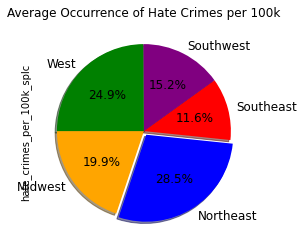

In [33]:
# Look at occurences of Hate Crimes across regions
explode = (0, 0.05, 0, 0, 0)
count_region.plot(kind='pie', y='region', \
                        title="Average Occurrence of Hate Crimes per 100k",startangle=180,\
                        autopct='%1.1f%%',shadow=True, explode= explode, fontsize=12, colors =["orange","blue", "red","purple", "green"],legend =False)
# Make the axis equal to avoid plotting an egg shaped pie chart
plt.savefig("Images/hate_crime_vs_region_pie.png")
plt.show()

# Scatter Plots

In [34]:
merged_df_fin.head()

,area_name,Total Edu 2014-18,Stabr,Average Unempl 2014-18,Total Crimes per 100k,Poverty (2018),median_household_income,hate_crimes_per_100k_splc,region
0,Alabama,24.9,AL,6.73,3.376140,16.8,42278.0,0.125839,Southeast
1,Alaska,29.2,AK,8.55,0.581852,11.1,67629.0,0.143740,West
2,Arizona,28.9,AZ,6.95,4.726068,14.1,49254.0,0.225320,Southwest
3,Arkansas,22.6,AR,5.58,2.228428,16.8,44922.0,0.069061,Southeast
4,California,33.3,CA,7.03,23.015516,12.8,60487.0,0.255805,West


R squared: 0.1335938135561209


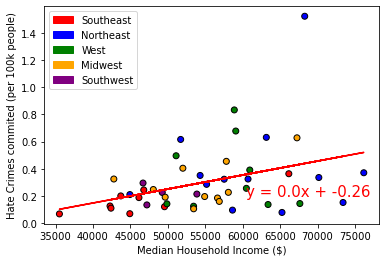

In [35]:
region_color= {"Southeast": "r", "Northeast": "b", 
              "West": "g", "Midwest": "orange", 
              "Southwest": "purple"}

labels = list(region_color.keys())
handles = [plt.Rectangle((0,0),1,1, color=region_color[label]) for label in labels]


x_values = merged_df_fin['median_household_income']
y_values = merged_df_fin['hate_crimes_per_100k_splc']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color=[region_color[i] for i in merged_df_fin["region"]], edgecolors="black")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60500,.2),fontsize=15,color="red")

plt.xlabel('Median Household Income ($)')
plt.ylabel('Hate Crimes commited (per 100k people)')

print(f"R squared: {rvalue**2}")

plt.legend(handles, labels, loc="upper left")

plt.savefig("Images/income_vs_hate_crime_scatter.png")
plt.show()

R squared: 0.010932997336871818


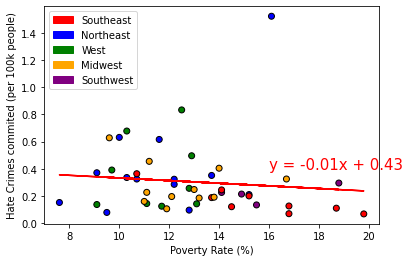

In [36]:
labels = list(region_color.keys())
handles = [plt.Rectangle((0,0),1,1, color=region_color[label]) for label in labels]


x_values = merged_df_fin['Poverty (2018)']
y_values = merged_df_fin['hate_crimes_per_100k_splc']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color=[region_color[i] for i in merged_df_fin["region"]], edgecolors="black")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,.4),fontsize=15,color="red")

plt.xlabel('Poverty Rate (%)')
plt.ylabel('Hate Crimes commited (per 100k people)')

print(f"R squared: {rvalue**2}")

plt.legend(handles, labels, loc="upper left")

plt.savefig("Images/poverty_vs_hate_crime_scatter.png")
plt.show()

R squared: 0.015271443127119814


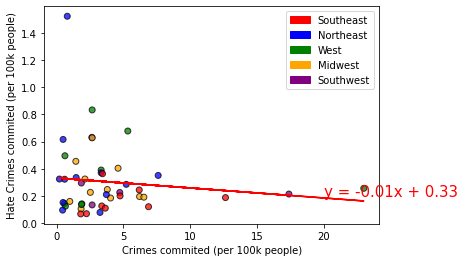

In [37]:
region_color= {"Southeast": "r", "Northeast": "b", 
              "West": "g", "Midwest": "orange", 
              "Southwest": "purple"}

labels = list(region_color.keys())
handles = [plt.Rectangle((0,0),1,1, color=region_color[label]) for label in labels]

x_axis= merged_df_fin['Total Crimes per 100k']
tick_locations=x_axis
y_axis =merged_df_fin['hate_crimes_per_100k_splc']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_values)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, color=[region_color[i] for i in merged_df_fin["region"]], edgecolors="black", alpha=0.75)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,.2),fontsize=15,color="red")

plt.xlabel('Crimes commited (per 100k people)')
plt.ylabel('Hate Crimes commited (per 100k people)')

print(f"R squared: {rvalue**2}")
plt.legend(handles, labels, loc="upper right")

plt.savefig("Images/crime_vs_hate_crime_scatter.png")
plt.show()

R squared: 0.45774235176276745


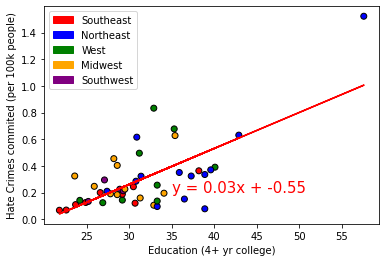

In [38]:
region_color= {"Southeast": "r", "Northeast": "b", 
              "West": "g", "Midwest": "orange", 
              "Southwest": "purple"}

labels = list(region_color.keys())
handles = [plt.Rectangle((0,0),1,1, color=region_color[label]) for label in labels]


x_values = merged_df_fin['Total Edu 2014-18']
y_values = merged_df_fin['hate_crimes_per_100k_splc']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color=[region_color[i] for i in merged_df_fin["region"]], edgecolors="black")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,.2),fontsize=15,color="red")

plt.xlabel('Education (4+ yr college)')
plt.ylabel('Hate Crimes commited (per 100k people)')

print(f"R squared: {rvalue**2}")

plt.legend(handles, labels, loc="upper left")

plt.savefig("Images/education_vs_hate_crime_scatter.png")
plt.show()

In [39]:
merged_df_fin.head()

,area_name,Total Edu 2014-18,Stabr,Average Unempl 2014-18,Total Crimes per 100k,Poverty (2018),median_household_income,hate_crimes_per_100k_splc,region
0,Alabama,24.9,AL,6.73,3.376140,16.8,42278.0,0.125839,Southeast
1,Alaska,29.2,AK,8.55,0.581852,11.1,67629.0,0.143740,West
2,Arizona,28.9,AZ,6.95,4.726068,14.1,49254.0,0.225320,Southwest
3,Arkansas,22.6,AR,5.58,2.228428,16.8,44922.0,0.069061,Southeast
4,California,33.3,CA,7.03,23.015516,12.8,60487.0,0.255805,West


In [40]:
merged_df_fin.dtypes

area_name                     object
Total Edu 2014-18            float64
Stabr                         object
Average Unempl 2014-18       float64
Total Crimes per 100k        float64
Poverty (2018)               float64
median_household_income      float64
hate_crimes_per_100k_splc    float64
region                        object
dtype: object

In [41]:
merged_df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 48
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   area_name                  46 non-null     object 
 1   Total Edu 2014-18          46 non-null     float64
 2   Stabr                      46 non-null     object 
 3   Average Unempl 2014-18     46 non-null     float64
 4   Total Crimes per 100k      46 non-null     float64
 5   Poverty (2018)             46 non-null     float64
 6   median_household_income    46 non-null     float64
 7   hate_crimes_per_100k_splc  46 non-null     float64
 8   region                     46 non-null     object 
dtypes: float64(6), object(3)
memory usage: 3.6+ KB


# Bar Charts

In [42]:
merged_df_fin.head()

,area_name,Total Edu 2014-18,Stabr,Average Unempl 2014-18,Total Crimes per 100k,Poverty (2018),median_household_income,hate_crimes_per_100k_splc,region
0,Alabama,24.9,AL,6.73,3.376140,16.8,42278.0,0.125839,Southeast
1,Alaska,29.2,AK,8.55,0.581852,11.1,67629.0,0.143740,West
2,Arizona,28.9,AZ,6.95,4.726068,14.1,49254.0,0.225320,Southwest
3,Arkansas,22.6,AR,5.58,2.228428,16.8,44922.0,0.069061,Southeast
4,California,33.3,CA,7.03,23.015516,12.8,60487.0,0.255805,West


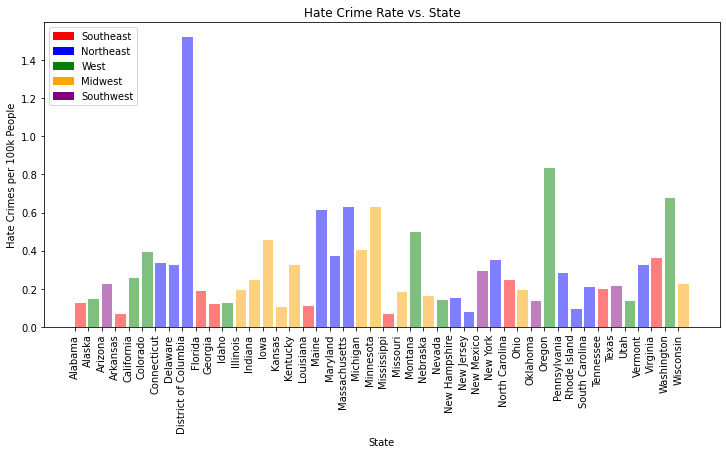

In [43]:
region_color= {"Southeast": "r", "Northeast": "b", 
              "West": "g", "Midwest": "orange", 
              "Southwest": "purple"}
labels = list(region_color.keys())
handles = [plt.Rectangle((0,0),1,1, color=region_color[label]) for label in labels]
# merged_df_fin["area_name"].plot(kind='bar', color=[region_color[i] for i in merged_df_fin["region"]])
x_axis=merged_df_fin["area_name"]
tick_locations=x_axis
y_axis =merged_df_fin['hate_crimes_per_100k_splc']
plt.figure(figsize=(10,6))
state_hate_crime = plt.bar(x_axis, y_axis, color=[region_color[i] for i in merged_df_fin["region"]], alpha=0.5, align="edge")
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.tight_layout()
plt.ylabel("Hate Crimes per 100k People")
plt.xlabel("State")
plt.legend(handles, labels, loc="upper left")
plt.title("Hate Crime Rate vs. State")

plt.savefig("Images/state_vs_hate_crime_bar.png")
plt.show()

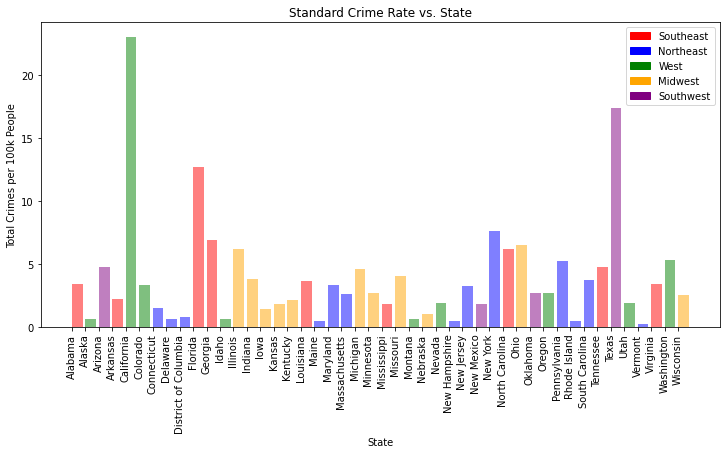

In [44]:
region_color_2= {"Southeast": "r", "Northeast": "b", 
              "West": "g", "Midwest": "orange", 
              "Southwest": "purple"}
labels = list(region_color.keys())
handles = [plt.Rectangle((0,0),1,1, color=region_color[label]) for label in labels]
# merged_df_fin["area_name"].plot(kind='bar', color=[region_color[i] for i in merged_df_fin["region"]])
x_axis=merged_df_fin["area_name"]
tick_locations=x_axis
y_axis =merged_df_fin['Total Crimes per 100k']
plt.figure(figsize=(10,6))
plt.bar(x_axis, y_axis, color=[region_color_2[i] for i in merged_df_fin["region"]],  alpha=0.5, align="edge")
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.tight_layout()
plt.legend(handles, labels, loc="upper right")
plt.ylabel("Total Crimes per 100k People")
plt.xlabel("State")
plt.title("Standard Crime Rate vs. State")

plt.savefig("Images/state_vs_standard_crime_bar.png")
plt.show()

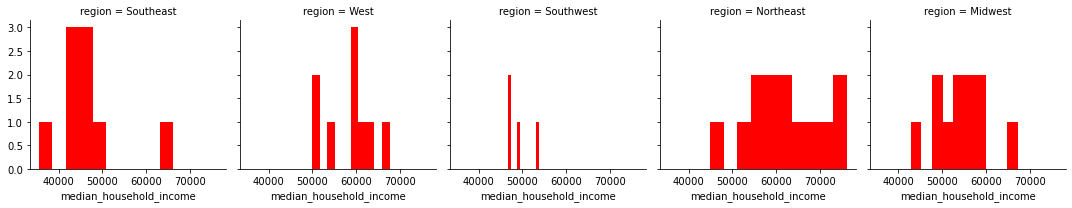

In [45]:
g=sns.FacetGrid(merged_df_fin, col="region")
g=g.map(plt.hist, "median_household_income", color="r")
# plt.ylabel("Number of States")


plt.savefig("Images/income_vs_hate_crime_region_facet_bar.png")
plt.show()
# yaxis is showing number of states, while x is showing median household income

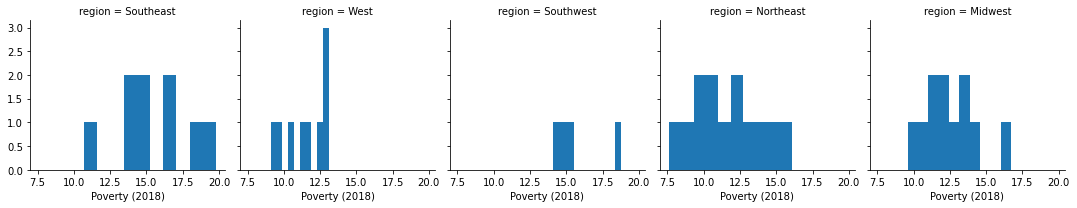

In [46]:
z=sns.FacetGrid(merged_df_fin, col="region")
z=z.map(plt.hist, "Poverty (2018)")

plt.savefig("Images/poverty_vs_hate_crime_region_facet_bar.png")
plt.show()
# yaxis is showing number of states, while x is showing median household income

# Box Plot

In [47]:
merged_df_fin['region'].value_counts()

Northeast    13
Midwest      11
Southeast     9
West          9
Southwest     4
Name: region, dtype: int64

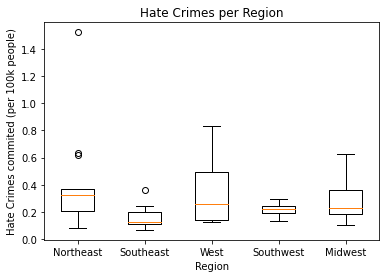

In [48]:
northeast_plot=merged_df_fin.loc[(merged_df_fin["region"]=="Northeast")]["hate_crimes_per_100k_splc"]
southeast_plot=merged_df_fin.loc[(merged_df_fin["region"]=="Southeast")]["hate_crimes_per_100k_splc"]
west_plot=merged_df_fin.loc[(merged_df_fin["region"]=="West")]["hate_crimes_per_100k_splc"]
southwest_plot=merged_df_fin.loc[(merged_df_fin["region"]=="Southwest")]["hate_crimes_per_100k_splc"]
midwest_plot=merged_df_fin.loc[(merged_df_fin["region"]=="Midwest")]["hate_crimes_per_100k_splc"]


data = [northeast_plot.dropna(), southeast_plot.dropna(), west_plot.dropna(), southwest_plot.dropna(), midwest_plot.dropna()]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title("Hate Crimes per Region")
x_ticks = [1,2,3,4,5]
plt.xticks(x_ticks,["Northeast", "Southeast", "West","Southwest", "Midwest"])
ax.set_ylabel("Hate Crimes commited (per 100k people)")
ax.set_xlabel("Region")


plt.savefig("Images/region_vs_hate_crime_box.png")
plt.show()

# Heat Maps

In [64]:
fig = px.choropleth(merged_df_fin,  # Input Pandas DataFrame
                    locations="Stabr",  # DataFrame column with locations
                    color="Average Unempl 2014-18",  # DataFrame column with color values
                    color_continuous_scale="Blues",
                    hover_name="area_name", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
# colorscale = ['#f2f0f7','#dadaeb','#bcbddc','#9e9ac8','#756bb1','#54278f']
fig.update_layout(
    title_text = 'State Rankings Based on Unemployment', # Create a Title
    autosize=False,
    width=800,
    height=400,
#     autocolorscale = True,
#     colorscale = "sequential", 
    geo_scope='usa',  # Plot only the USA instead of globe
)

# fig.update_yaxes(automargin=True)
# plt.savefig("Images/unemployment_heat_map.png")
fig.show()  # Output the plot to the screen

In [63]:
fig = px.choropleth(merged_df_fin,  # Input Pandas DataFrame
                    locations="Stabr",  # DataFrame column with locations
                    color="hate_crimes_per_100k_splc",  # DataFrame column with color values
                    color_continuous_scale="reds",
                    hover_name="area_name", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
# colorscale = ['#f2f0f7','#dadaeb','#bcbddc','#9e9ac8','#756bb1','#54278f']
fig.update_layout(
    title_text = 'State Rankings Based on Hate Crimes Reported', # Create a Title
    autosize=False,
    width=800,
    height=400,
#     autocolorscale = True,
#     colorscale = "sequential", 
    geo_scope='usa',  # Plot only the USA instead of globe
)

# fig.update_yaxes(automargin=True)
# plt.savefig("Images/hate_crime_heat_map.png")
fig.show()  # Output the plot to the screen

In [56]:
fig = px.choropleth(merged_df_fin,  # Input Pandas DataFrame
                    locations="Stabr",  # DataFrame column with locations
                    color="Total Edu 2014-18",  # DataFrame column with color values
                    color_continuous_scale="Greens",
                    hover_name="area_name", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
# colorscale = ['#f2f0f7','#dadaeb','#bcbddc','#9e9ac8','#756bb1','#54278f']
fig.update_layout(
    title_text = 'State Rankings Based on Education', # Create a Title
    autosize=False,
    width=800,
    height=400,
#     autocolorscale = True,
#     colorscale = "sequential", 
    geo_scope='usa',  # Plot only the USA instead of globe
)

# fig.update_yaxes(automargin=True)
# plt.savefig("Images/unemployment_heat_map.png")
fig.show()  # Output the plot to the screen

In [65]:
fig = px.choropleth(merged_df_fin,  # Input Pandas DataFrame
                    locations="Stabr",  # DataFrame column with locations
                    color="median_household_income",  # DataFrame column with color values
                    color_continuous_scale="Purples",
                    hover_name="area_name", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
# colorscale = ['#f2f0f7','#dadaeb','#bcbddc','#9e9ac8','#756bb1','#54278f']
fig.update_layout(
    title_text = 'State Rankings Based on Income', # Create a Title
    autosize=False,
    width=800,
    height=400,
#     autocolorscale = True,
#     colorscale = "sequential", 
    geo_scope='usa',  # Plot only the USA instead of globe
)

# fig.update_yaxes(automargin=True)
# plt.savefig("Images/unemployment_heat_map.png")
fig.show()  # Output the plot to the screen

In [51]:
# merged_df_fin_region_order = merged_df_fin.sort_values(by=['region'])
# merged_df_fin_region_order.head()
# labels = list(region_color.keys())
# handles = [plt.Rectangle((0,0),1,1, color=region_color[label]) for label in labels]
# # merged_df_fin["area_name"].plot(kind='bar', color=[region_color[i] for i in merged_df_fin["region"]])
# x_axis=merged_df_fin_region_order["area_name"]
# tick_locations=x_axis
# y_axis =merged_df_fin_region_order['hate_crimes_per_100k_splc']
# plt.figure(figsize=(10,6))
# state_hate_crime = plt.bar(x_axis, y_axis, color=[region_color[i] for i in merged_df_fin["region"]], alpha=0.5, align="edge")
# plt.xticks(tick_locations, x_axis, rotation="vertical")
# plt.tight_layout()
# plt.ylabel("Hate Crimes per 100k People")
# plt.xlabel("State")
# plt.legend(handles, labels, loc="upper left")
# plt.title("Hate Crime Rate vs. State")
# plt.show()

In [52]:
# merged_df_fin_poverty = merged_df_fin.sort_values(by=['Poverty (2018)'])
# # tick_locations=np.arange(.3, .10, .1)
# merged_df_fin_poverty.plot(kind="scatter", x="Poverty (2018)", y= "hate_crimes_per_100k_splc", grid=True)
# # plt.xticks(tick_locations, x_axis, rotation="vertical")
# plt.xticks(rotation="vertical")
# # plt.xlim([0, 20]) 
# # plt.ylim([0, 20]) 
# plt.show()

In [53]:
# merged_df_fin_income = merged_df_fin.sort_values(by=['median_household_income'])
# merged_df_fin_income.plot(kind="scatter", x="median_household_income", y= "hate_crimes_per_100k_splc", grid=True)
# # plt.xticks(tick_locations, x_axis, rotation="vertical")
# plt.xticks(rotation="vertical")
# plt.show()

In [54]:
# Clean FBI Data set - take 2014-2018 data and average hate crimes fbi